In [ ]:
import pandas as pd
audit_data  = pd.read_csv("https://raw.githubusercontent.com/dphi-official/Datasets/master/credit_risk/training_set_labels.csv" )
test_data = pd.read_csv('https://raw.githubusercontent.com/dphi-official/Datasets/master/credit_risk/testing_set_labels.csv')

In [ ]:
audit_data.head()

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,residence_since,property_magnitude,age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker,class
0,'no checking',18,'critical/other existing credit',radio/tv,1800,'<100','1<=X<4',4,'male single',none,2,car,24,none,own,2,skilled,1,none,yes,good
1,'<0',24,'existing paid',radio/tv,2439,'<100','<1',4,'female div/dep/mar',none,4,'real estate',35,none,own,1,skilled,1,yes,yes,bad
2,'no checking',36,'no credits/all paid',repairs,2613,'<100','1<=X<4',4,'male single',none,2,car,27,none,own,2,skilled,1,none,yes,good
3,'no checking',15,'existing paid',education,4623,'100<=X<500','1<=X<4',3,'male single',none,2,'life insurance',40,none,own,1,'high qualif/self emp/mgmt',1,yes,yes,bad
4,'<0',21,'existing paid',furniture/equipment,3599,'<100','4<=X<7',1,'female div/dep/mar',none,4,car,26,none,rent,1,'unskilled resident',1,none,yes,good


In [ ]:
test_data.head()

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,residence_since,property_magnitude,age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker
0,'no checking',18,'existing paid','new car',2662,'no known savings','4<=X<7',4,'male single',none,3,'life insurance',32,none,own,1,skilled,1,none,no
1,'no checking',18,'existing paid',radio/tv,1505,'<100','1<=X<4',4,'male single',none,2,'no known property',32,none,'for free',1,'high qualif/self emp/mgmt',1,yes,yes
2,'no checking',12,'delayed previously',repairs,1555,'>=1000','>=7',4,'male single',none,4,'no known property',55,none,'for free',2,skilled,2,none,yes
3,'no checking',15,'existing paid','new car',3186,'>=1000','4<=X<7',2,'female div/dep/mar',none,3,car,20,none,rent,1,skilled,1,none,yes
4,'<0',48,'no credits/all paid','used car',4605,'<100','>=7',3,'male single',none,4,'no known property',24,none,'for free',2,skilled,2,none,yes


In [ ]:
audit_data.shape

(800, 21)

In [ ]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   checking_status         200 non-null    object
 1   duration                200 non-null    int64 
 2   credit_history          200 non-null    object
 3   purpose                 200 non-null    object
 4   credit_amount           200 non-null    int64 
 5   savings_status          200 non-null    object
 6   employment              200 non-null    object
 7   installment_commitment  200 non-null    int64 
 8   personal_status         200 non-null    object
 9   other_parties           200 non-null    object
 10  residence_since         200 non-null    int64 
 11  property_magnitude      200 non-null    object
 12  age                     200 non-null    int64 
 13  other_payment_plans     200 non-null    object
 14  housing                 200 non-null    object
 15  existi

In [ ]:
audit_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   checking_status         800 non-null    object
 1   duration                800 non-null    int64 
 2   credit_history          800 non-null    object
 3   purpose                 800 non-null    object
 4   credit_amount           800 non-null    int64 
 5   savings_status          800 non-null    object
 6   employment              800 non-null    object
 7   installment_commitment  800 non-null    int64 
 8   personal_status         800 non-null    object
 9   other_parties           800 non-null    object
 10  residence_since         800 non-null    int64 
 11  property_magnitude      800 non-null    object
 12  age                     800 non-null    int64 
 13  other_payment_plans     800 non-null    object
 14  housing                 800 non-null    object
 15  existi

In [ ]:
audit_data.describe()

,duration,credit_amount,installment_commitment,residence_since,age,existing_credits,num_dependents
count,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000
mean,21.031250,3337.878750,2.945000,2.878750,35.631250,1.410000,1.142500
std,12.171502,2866.828413,1.118498,1.092264,11.757682,0.574293,0.349781
min,4.000000,250.000000,1.000000,1.000000,19.000000,1.000000,1.000000
25%,12.000000,1364.000000,2.000000,2.000000,26.000000,1.000000,1.000000
50%,18.000000,2332.000000,3.000000,3.000000,33.000000,1.000000,1.000000
75%,24.000000,4166.000000,4.000000,4.000000,42.000000,2.000000,1.000000
max,60.000000,18424.000000,4.000000,4.000000,75.000000,4.000000,2.000000


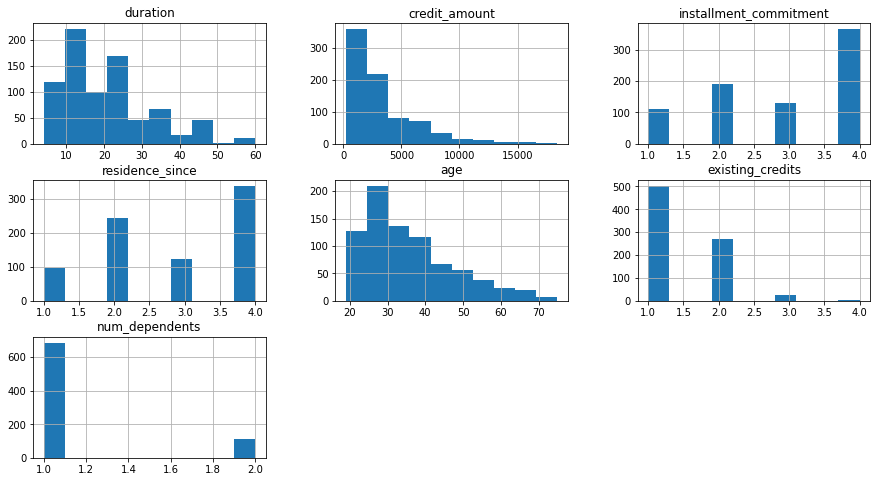

In [ ]:
audit_data.hist(figsize=(15,8));



*   Age, credit_amount and duration are positively skewed
*   Rest of the features are discrete



In [ ]:
train_test_data = [audit_data, test_data] # combining train and test dataset

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()

In [ ]:
def bar_chart(feature):
    good = audit_data[audit_data['class']=='good'][feature].value_counts()
    bad = audit_data[audit_data['class']=='bad'][feature].value_counts()
    df = pd.DataFrame([good,bad])
    df.index = ['Good','Bad']
    df.plot(kind='bar',stacked=True, figsize=(10,5))

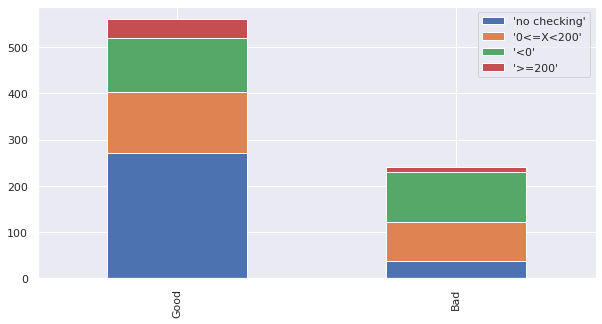

In [ ]:
bar_chart('checking_status')

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


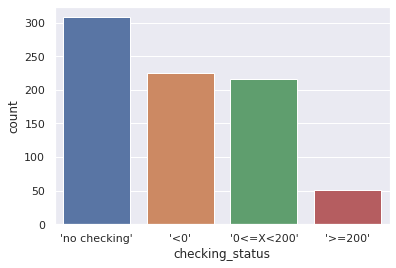

In [ ]:
sns.countplot(audit_data['checking_status'])

In [ ]:
checking_status_map={'\'no checking\'':0,'\'<0\'':1,'\'0<=X<200\'':2,'\'>=200\'':3}
for dataset in train_test_data:
    dataset['checking_status'] = dataset['checking_status'].map(checking_status_map)

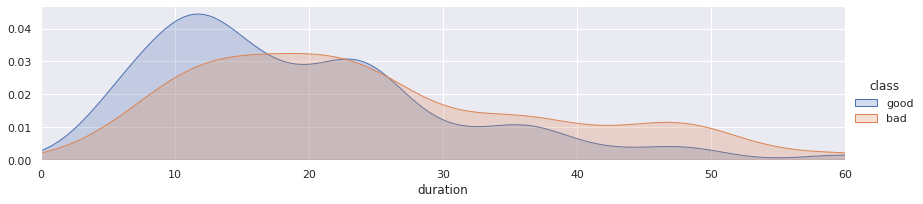

In [ ]:
facet = sns.FacetGrid(audit_data, hue="class",aspect=4)
facet.map(sns.kdeplot,'duration',shade= True)
facet.set(xlim=(0, audit_data['duration'].max()))
facet.add_legend()
 
plt.show()

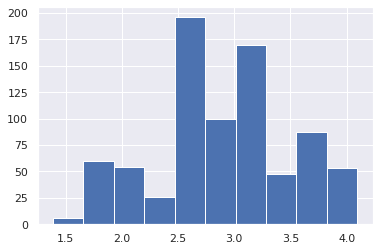

In [ ]:
import numpy as np
audit_data['duration'] = np.log(audit_data['duration'])
test_data['duration'] = np.log(test_data['duration'])
plt.hist(audit_data['duration']);

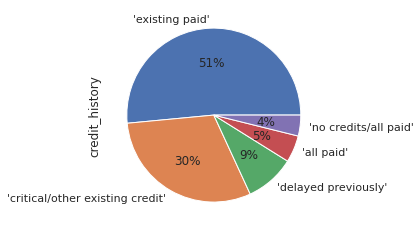

In [ ]:
audit_data.credit_history.value_counts().plot(kind='pie',autopct = "%1.0f%%")

Merge no credit and no credit/all paid

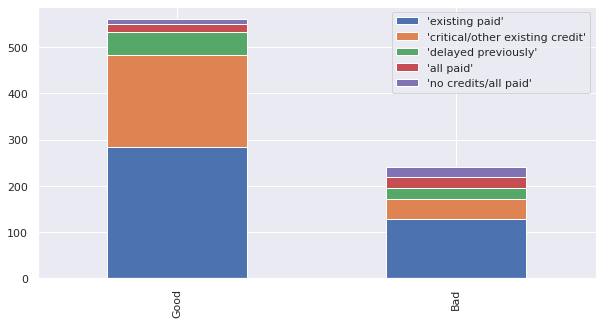

In [ ]:
bar_chart('credit_history')

In [ ]:
credit_history_map={'\'existing paid\'':0,'\'critical/other existing credit\'':1,'\'delayed previously\'':2,'\'all paid\'':3,'\'no credits/all paid\'':3}
for dataset in train_test_data:
    dataset['credit_history'] = dataset['credit_history'].map(credit_history_map)

In [ ]:
audit_data.head()

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,residence_since,property_magnitude,age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker,class
0,0,2.890372,1,radio/tv,1800,'<100','1<=X<4',4,'male single',none,2,car,24,none,own,2,skilled,1,none,yes,good
1,1,3.178054,0,radio/tv,2439,'<100','<1',4,'female div/dep/mar',none,4,'real estate',35,none,own,1,skilled,1,yes,yes,bad
2,0,3.583519,3,repairs,2613,'<100','1<=X<4',4,'male single',none,2,car,27,none,own,2,skilled,1,none,yes,good
3,0,2.708050,0,education,4623,'100<=X<500','1<=X<4',3,'male single',none,2,'life insurance',40,none,own,1,'high qualif/self emp/mgmt',1,yes,yes,bad
4,1,3.044522,0,furniture/equipment,3599,'<100','4<=X<7',1,'female div/dep/mar',none,4,car,26,none,rent,1,'unskilled resident',1,none,yes,good


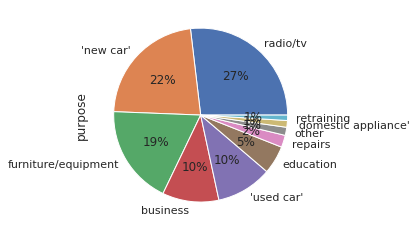

In [ ]:
audit_data.purpose.value_counts().plot(kind='pie',autopct = "%1.0f%%")

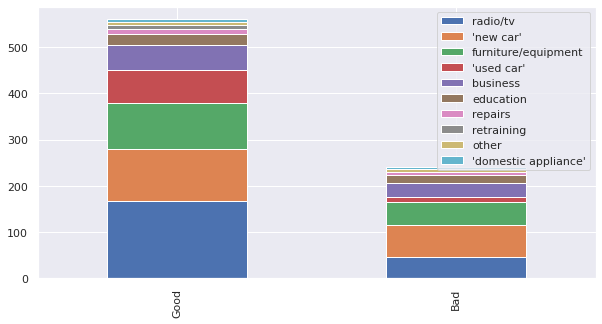

In [ ]:
bar_chart('purpose')

In [ ]:
purpose_map={'radio/tv':0,'\'new car\'':1,'furniture/equipment':2,'\'used car\'':3,'business':4,'education':5,'repairs':6,'other':6,'retraining':6,'\'domestic appliance\'':6}
for dataset in train_test_data:
    dataset['purpose'] = dataset['purpose'].map(purpose_map)

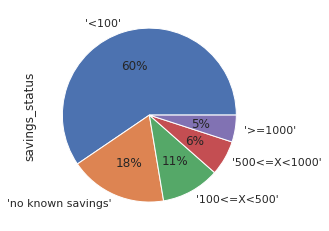

In [ ]:
audit_data.savings_status.value_counts().plot(kind='pie',autopct = "%1.0f%%")

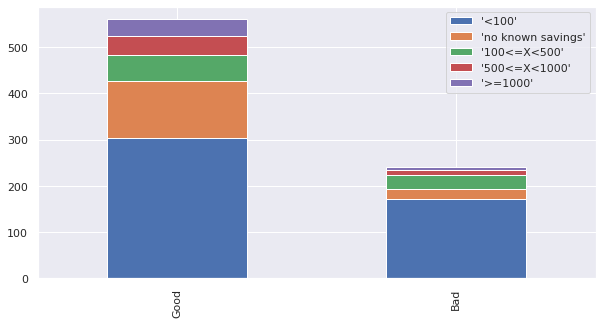

In [ ]:
bar_chart('savings_status')

In [ ]:
savings_status_map={'\'no known savings\'':0,'\'<100\'':1,'\'100<=X<500\'':2,'\'500<=X<1000\'':3,'\'>=1000\'':4}
for dataset in train_test_data:
    dataset['savings_status'] = dataset['savings_status'].map(savings_status_map)

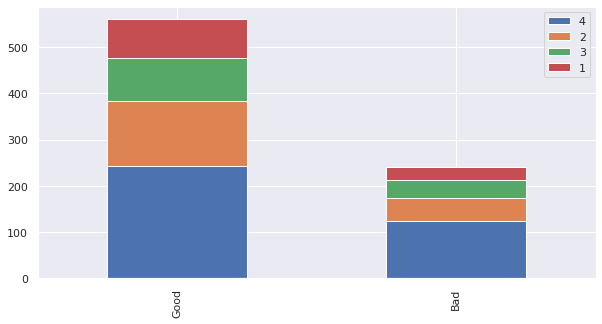

In [ ]:
bar_chart('installment_commitment')

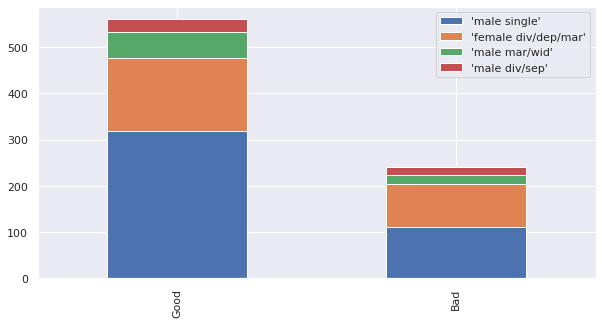

In [ ]:
bar_chart('personal_status')

In [ ]:
personal_status_map={'\'male single\'':0,'\'female div/dep/mar\'':1,'\'male mar/wid\'':2,'\'male div/sep\'':3}
for dataset in train_test_data:
    dataset['personal_status'] = dataset['personal_status'].map(personal_status_map)

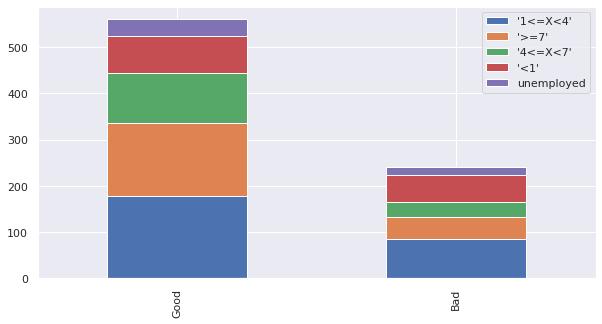

In [ ]:
bar_chart('employment')

In [ ]:
employment_map={'unemployed':0,'\'<1\'':1,'\'1<=X<4\'':2,'\'4<=X<7\'':3, '\'>=7\'':4}
for dataset in train_test_data:
    dataset['employment'] = dataset['employment'].map(employment_map)

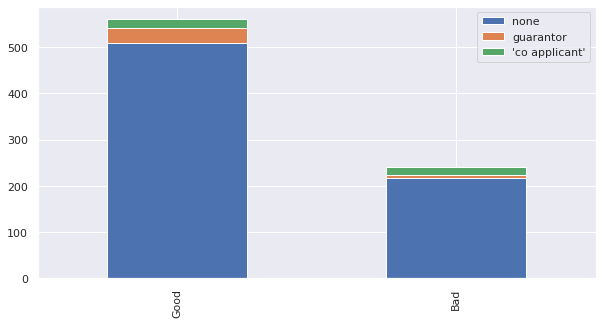

In [ ]:
bar_chart('other_parties')        

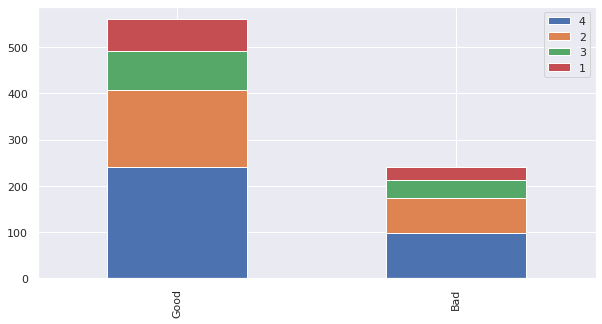

In [ ]:
bar_chart('residence_since') 

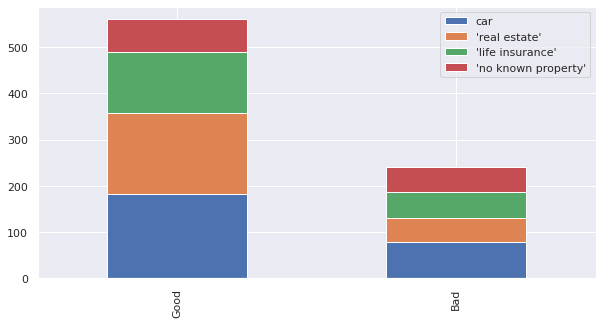

In [ ]:
bar_chart('property_magnitude')

In [ ]:
property_magnitude_map={'car':0,'\'real estate\'':1,'\'life insurance\'':2,'\'no known property\'':3}
for dataset in train_test_data:
    dataset['property_magnitude'] = dataset['property_magnitude'].map(property_magnitude_map)

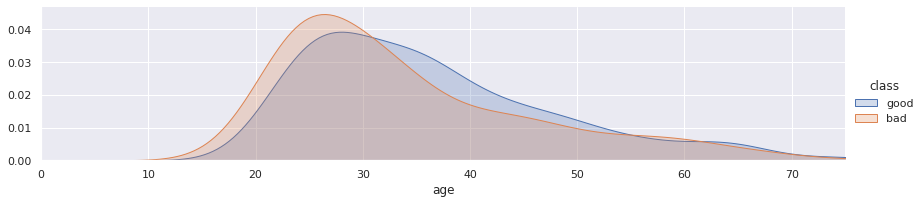

In [ ]:
facet = sns.FacetGrid(audit_data, hue="class",aspect=4)
facet.map(sns.kdeplot,'age',shade= True)
facet.set(xlim=(0, audit_data['age'].max()))
facet.add_legend()
 
plt.show()

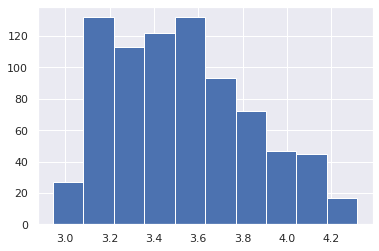

In [ ]:
audit_data['age'] = np.log(audit_data['age'])
test_data['age'] = np.log(test_data['age'])
plt.hist(audit_data['age']);

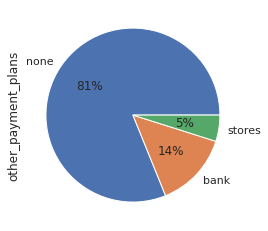

In [ ]:
audit_data.other_payment_plans.value_counts().plot(kind='pie',autopct = "%1.0f%%")

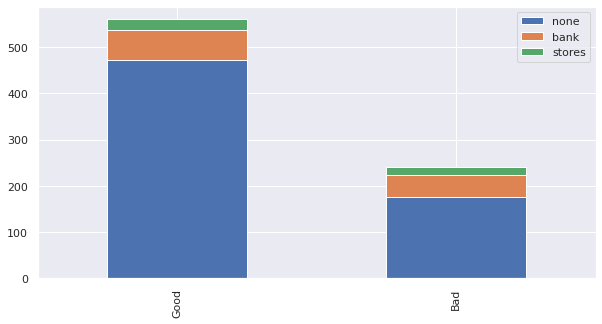

In [ ]:
bar_chart('other_payment_plans')

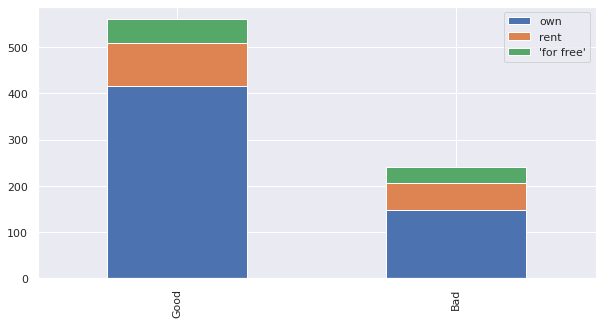

In [ ]:
bar_chart('housing')

In [ ]:
housing_map={'own':0,'rent':1,'\'for free\'':2}
for dataset in train_test_data:
    dataset['housing'] = dataset['housing'].map(housing_map)

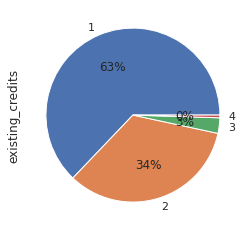

In [ ]:
audit_data.existing_credits.value_counts().plot(kind='pie',autopct = "%1.0f%%")

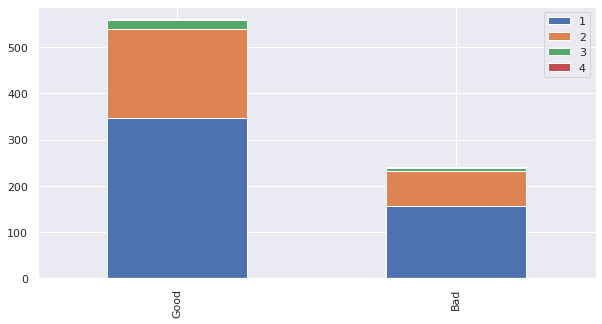

In [ ]:
bar_chart('existing_credits')

In [ ]:
credit = [3,4]
for i in credit:
    audit_data['existing_credits'] = np.where(audit_data['existing_credits']==i,3 , audit_data['existing_credits'])
    test_data['existing_credits'] = np.where(test_data['existing_credits']==i,3 , test_data['existing_credits'])

In [ ]:
audit_data.existing_credits.value_counts()

1    503
2    270
3     27
Name: existing_credits, dtype: int64

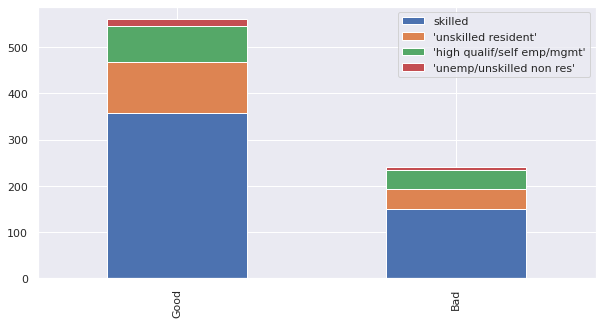

In [ ]:
bar_chart('job')

In [ ]:
job_map={'skilled':0,'\'unskilled resident\'':1,'\'high qualif/self emp/mgmt\'':2,'\'unemp/unskilled non res\'':3}
for dataset in train_test_data:
    dataset['job'] = dataset['job'].map(job_map)

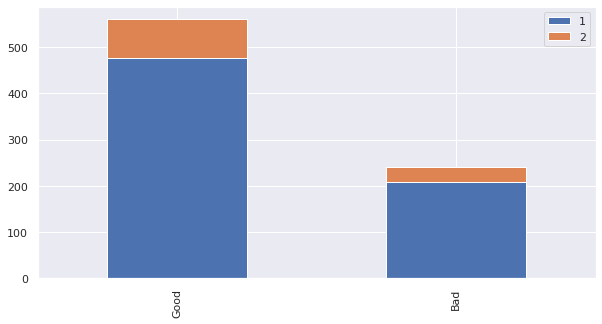

In [ ]:
bar_chart('num_dependents')

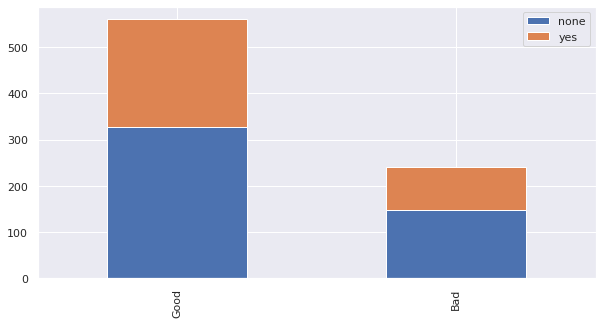

In [ ]:
bar_chart('own_telephone')

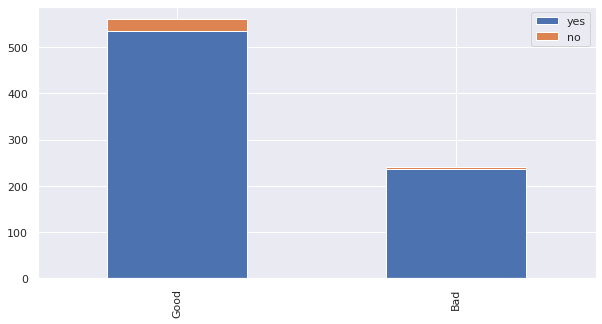

In [ ]:
bar_chart('foreign_worker')

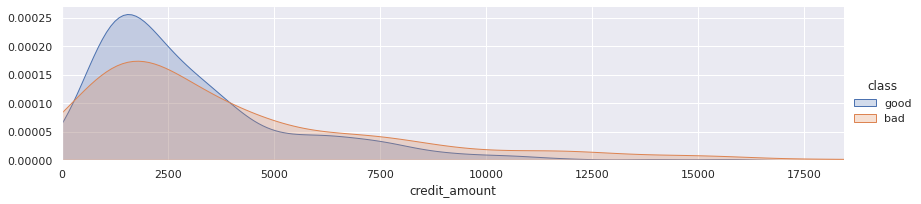

In [ ]:
facet = sns.FacetGrid(audit_data, hue="class",aspect=4)
facet.map(sns.kdeplot,'credit_amount',shade= True)
facet.set(xlim=(0, audit_data['credit_amount'].max()))
facet.add_legend()
 
plt.show()

In [ ]:
audit_data['credit_amount'] = np.log(audit_data['credit_amount'])
test_data['credit_amount'] = np.log(test_data['credit_amount'])

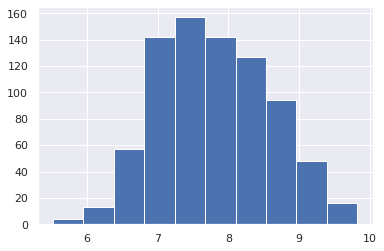

In [ ]:
plt.hist(audit_data['credit_amount']);

In [ ]:
class_map={'good':1,'bad':0}
audit_data['class'] = audit_data['class'].map(class_map)

In [ ]:
audit_data.head()

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,residence_since,property_magnitude,age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker,class
0,0,2.890372,1,0,7.495542,1,2,4,0,none,2,0,3.178054,none,0,2,0,1,none,yes,1
1,1,3.178054,0,0,7.799343,1,1,4,1,none,4,1,3.555348,none,0,1,0,1,yes,yes,0
2,0,3.583519,3,6,7.868254,1,2,4,0,none,2,0,3.295837,none,0,2,0,1,none,yes,1
3,0,2.708050,0,5,8.438799,2,2,3,0,none,2,2,3.688879,none,0,1,2,1,yes,yes,0
4,1,3.044522,0,2,8.188411,1,3,1,1,none,4,0,3.258097,none,1,1,1,1,none,yes,1


In [ ]:
target = audit_data['class']
audit_data= audit_data.drop('class', axis=1)
drop_classes=['other_parties','other_payment_plans','own_telephone','foreign_worker','num_dependents']
train = audit_data.drop(drop_classes, axis=1)
test = test_data.drop(drop_classes, axis=1)

train.shape, target.shape


((800, 15), (800,))

In [ ]:
train.head()

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,residence_since,property_magnitude,age,housing,existing_credits,job
0,0,2.890372,1,0,7.495542,1,2,4,0,2,0,3.178054,0,2,0
1,1,3.178054,0,0,7.799343,1,1,4,1,4,1,3.555348,0,1,0
2,0,3.583519,3,6,7.868254,1,2,4,0,2,0,3.295837,0,2,0
3,0,2.708050,0,5,8.438799,2,2,3,0,2,2,3.688879,0,1,2
4,1,3.044522,0,2,8.188411,1,3,1,1,4,0,3.258097,1,1,1


In [ ]:
test.head()

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,residence_since,property_magnitude,age,housing,existing_credits,job
0,0,2.890372,0,1,7.886833,0,3,4,0,3,2,3.465736,0,1,0
1,0,2.890372,0,0,7.316548,1,2,4,0,2,3,3.465736,2,1,2
2,0,2.484907,2,6,7.349231,4,4,4,0,4,3,4.007333,2,2,0
3,0,2.708050,0,1,8.066521,4,3,2,1,3,0,2.995732,1,1,0
4,1,3.871201,3,3,8.434898,1,4,3,0,4,3,3.178054,2,2,0


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

import numpy as np

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   checking_status         800 non-null    int64  
 1   duration                800 non-null    float64
 2   credit_history          800 non-null    int64  
 3   purpose                 800 non-null    int64  
 4   credit_amount           800 non-null    float64
 5   savings_status          800 non-null    int64  
 6   employment              800 non-null    int64  
 7   installment_commitment  800 non-null    int64  
 8   personal_status         800 non-null    int64  
 9   residence_since         800 non-null    int64  
 10  property_magnitude      800 non-null    int64  
 11  age                     800 non-null    float64
 12  housing                 800 non-null    int64  
 13  existing_credits        800 non-null    int64  
 14  job                     800 non-null    in

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.metrics import accuracy_score
X_train, X_test, y_train, y_test = train_test_split(train, target, test_size=0.25, random_state=42)

In [ ]:
rf = RandomForestClassifier(random_state=42)

# Train Model 
rf.fit(X_train, y_train)

# Prediction on Test set
pred_rf = rf.predict(X_test)

# Accuracy on test set: 
print("Test Accuracy: ", accuracy_score(pred_rf, y_test))

Test Accuracy:  0.735


In [ ]:
rf2 = RandomForestClassifier(n_estimators=250, max_features=10, max_depth=7, random_state=42)

# Train data
rf1.fit(X_train, y_train)

# prediction on Test set
pred_rf1 = rf1.predict(X_test)

# Accuracy on test set
print("Test Accuracy: ", accuracy_score(pred_rf1, y_test))

Test Accuracy:  0.755


In [ ]:
gb = GradientBoostingClassifier()

# Training model
gb.fit(X_train, y_train)

# Prediction on test set
gb_pred = gb.predict(X_test)

# Accuracy score on Test set
print("Test Accuracy: ", accuracy_score(y_test, gb_pred))

Test Accuracy:  0.74


In [110]:
test_rf_pred = rf1.predict(test)
test_gb_pred = gb.predict(test)

In [111]:
output_rf = pd.DataFrame({
        "prediction":  test_rf_pred
    })
output_gb = pd.DataFrame({
        "prediction":  test_gb_pred
    })


In [113]:
rf_output=output_rf.prediction.map(lambda x: 'good' if x==1 else 'bad')
gb_output=output_gb.prediction.map(lambda x: 'good' if x==1 else 'bad')

In [115]:
rf_output.to_csv('/content/drive/My Drive/Colab Notebooks/bank_loan_problem/RF_prediction.csv', index=False)
gb_output.to_csv('/content/drive/My Drive/Colab Notebooks/bank_loan_problem/GB_prediction.csv', index=False)


*   Test set score (RF)= 75.5
*   Test set score (GB)= 76


